# Oppgaver :)

#### 1) Importér pandas
Kall pakken for "pd" slik at du kan referere til den med dette navnet framover.

In [2]:
import pandas as pd

In [3]:
#For å sjekke om pakken er importert, kjør denne snutten. Om den er importert, skal du få versjonsnummeret opp
print(pd)

<module 'pandas' from '/opt/conda/lib/python3.10/site-packages/pandas/__init__.py'>


#### 2) Importér datasett fra csv til pandas-datasett
Sørg først for å få lastet opp csv-filen ("S:\Organisasjon\A400\S426\Felles\Diverse samordning\seksjonsseminar_python_data\bygg_kongsvinger.csv") til Dapla og legg den inn i mappen "s426-python-ressurser". \
Print deretter ut datasettet.

In [4]:
bygg = pd.read_csv("bygg_kongsvinger.csv")
bygg.head(15)

,KOMMUNENR,ID,BYGNINGSTYPE,BYGNINGSSTATUS,BRUKSAREAL_TOTALT
0,3401,110292668,162,TB,38
1,3401,110333185,163,TB,86
2,3401,110311393,161,TB,16
3,3401,110214648,161,TB,49
4,3401,110293747,161,TB,29
5,3401,110321418,161,TB,33
6,3401,110299634,161,TB,57
7,3401,110245548,161,TB,39
8,3401,110228624,161,TB,20
9,3401,110207646,161,TB,38


#### 3) Utforsk datasett med enkel deskriptiv statistikk
Skriv ut deskriptiv statistikk: f. eks. gjennomsnitt, antall rader og median. Dette er mest interessant for bruksareal. \
Her kan det også være ønskelig å skrive ut den deskriptive statistikken gruppert på en annen kategorisk variabel (for eksempel bygningstype) slik at vi får et gjennomsnitt, antall rader og median for hver gruppe.

In [17]:
#bygg['BRUKSAREAL_TOTALT'].describe()
#bygg.groupby('BYGNINGSTYPE')['BRUKSAREAL_TOTALT'].describe().transpose ()#

count    1323.000000
mean       65.105064
std        40.944137
min         0.000000
25%        40.000000
50%        56.000000
75%        81.500000
max       370.000000
Name: BRUKSAREAL_TOTALT, dtype: float64

#### 4) Sortér datasett etter bygningstype

In [20]:
bygg.sort_values (by =['BYGNINGSTYPE'])

,KOMMUNENR,ID,BYGNINGSTYPE,BYGNINGSSTATUS,BRUKSAREAL_TOTALT
661,3401,110210221,161,TB,29
811,3401,110322622,161,TB,22
812,3401,110294291,161,TB,0
814,3401,110226473,161,TB,62
815,3401,523597737,161,FA,54
...,...,...,...,...,...
337,3401,110199446,163,TB,160
340,3401,110332583,163,TB,95
346,3401,110323133,163,TB,210
1209,3401,110307078,163,TB,258


#### 5) Endre navn på kolonne
Vi synes bygningsstatus er litt langt. Derfor kan vi endre navn på denne til bare "status". Print datasettet for å sjekke om kolonnen faktisk endret navn.

In [26]:
bygg = bygg.rename(columns={"BYGNINGSSTATUS" : "STATUS"})
bygg

,KOMMUNENR,ID,BYGNINGSTYPE,STATUS,BRUKSAREAL_TOTALT
0,3401,110292668,162,TB,38
1,3401,110333185,163,TB,86
2,3401,110311393,161,TB,16
3,3401,110214648,161,TB,49
4,3401,110293747,161,TB,29
...,...,...,...,...,...
1318,3401,110295594,163,TB,121
1319,3401,110261640,161,TB,73
1320,3401,110259903,161,TB,22
1321,3401,110230672,161,TB,99


#### 6) Filtrér datasett
##### a) Lag et nytt datasett som heter "igangsatte_bygg" hvor bare bygg med igangsatt-status (IG) kommer med.
##### b) I datasettet igangsatte_bygg vil vi kun ha med kolonnene ID, BYGNINGSTYPE og BRUKSAREAL_TOTALT.

In [34]:
igangsatte_bygg = bygg.loc[bygg['STATUS'] == "IG"]
igangsatte_bygg = igangsatte_bygg[['ID', 'BYGNINGSTYPE', 'BRUKSAREAL_TOTALT']]
igangsatte_bygg

,ID,BYGNINGSTYPE,BRUKSAREAL_TOTALT
11,6405143090,161,130
54,6280815808,161,7
313,6278426749,161,9
367,6401297080,161,27
632,6406822840,161,26
641,6406874270,161,22
748,6240980075,161,30
852,6391826660,161,24
860,6392050821,161,34
868,110270932,161,160


#### 7) Endre datatype til kolonne
Vi kan se hvilke datatyper de ulike kolonnene er ved å bruke "dtypes"-funksjonen:

In [35]:
bygg.dtypes

KOMMUNENR             int64
ID                    int64
BYGNINGSTYPE          int64
STATUS               object
BRUKSAREAL_TOTALT     int64
dtype: object

KOMMUNENR er en såkalt int64-kolonne (numerisk). Denne ønsker vi å gjøre om til en "string"-kolonne (tekst).

In [41]:
bygg['KOMMUNENR'] = bygg['KOMMUNENR'].astype("string")

In [42]:
#For å sjekke om variabelen ble gjort om til string, kjør bygg.dtypes igjen:
bygg.dtypes

KOMMUNENR            string
ID                    int64
BYGNINGSTYPE          int64
STATUS               object
BRUKSAREAL_TOTALT     int64
dtype: object

#### 8) Lag ny kolonne
##### a) Lag en ny kolonne for fylke basert på de to første sifrene i kommunenummeret.
Husk at i Python teller en fra 0!
##### b) Mange av bygningene har veldig lavt bruksareal. Dette er kanskje tilbygg og påbygg eller bygninger som ikke har ført areal i det hele tatt. Vi ønsker å lage en dikotom variabel som indikerer om bruksareal er mindre enn 15 kvadratmeter.

In [47]:
bygg['FYLKE'] = bygg['KOMMUNENR'].str[:2]

bygg.loc[bygg['BRUKSAREAL_TOTALT'] < 35, 'LITE_BRUKSAREAL'] = True
bygg.loc[bygg['BRUKSAREAL_TOTALT'] >= 35, 'LITE_BRUKSAREAL'] = False
bygg

,KOMMUNENR,ID,BYGNINGSTYPE,STATUS,BRUKSAREAL_TOTALT,FYLKE,LITE_BRUKSAREAL
0,3401,110292668,162,TB,38,34,False
1,3401,110333185,163,TB,86,34,False
2,3401,110311393,161,TB,16,34,True
3,3401,110214648,161,TB,49,34,False
4,3401,110293747,161,TB,29,34,True
...,...,...,...,...,...,...,...
1318,3401,110295594,163,TB,121,34,False
1319,3401,110261640,161,TB,73,34,False
1320,3401,110259903,161,TB,22,34,True
1321,3401,110230672,161,TB,99,34,False


#### 9) Koble på dato-variabel fra byggesakshistorikk
I bygningstabellen finner en datovariabler som sier noe om når et bygg er igangsatt, har fått rammetillatelse osv. med bakgrunn i byggesakshistorikk. Vi ønsker å koble på datoen som bygningen ble tatt i bruk på, som vi har lagt i en annen tabell. Denne tabellen heter byggdato_kongsvinger.csv og må lastes inn på samme måte som den andre csv-filen.

Når csv-filen er lastet inn som et pandas-datasett, kan vi koble denne tabellen med nøkkelen "ID" (bygningid).

In [52]:
byggdato = pd.read_csv("byggdato_kongsvinger.csv")
koblet = bygg.merge(byggdato)
koblet

,KOMMUNENR,ID,BYGNINGSTYPE,STATUS,BRUKSAREAL_TOTALT,FYLKE,LITE_BRUKSAREAL,TATTIBRUK_DATO
0,3401,110292668,162,TB,38,34,False,NaN
1,3401,110333185,163,TB,86,34,False,NaN
2,3401,110311393,161,TB,16,34,True,NaN
3,3401,110214648,161,TB,49,34,False,1970-01-01 00:00:00
4,3401,110293747,161,TB,29,34,True,NaN
...,...,...,...,...,...,...,...,...
1318,3401,110295594,163,TB,121,34,False,NaN
1319,3401,110261640,161,TB,73,34,False,1999-09-08 00:00:00
1320,3401,110259903,161,TB,22,34,True,NaN
1321,3401,110230672,161,TB,99,34,False,1940-01-01 00:00:00


#### 10) Lag et histogram av bruksareal i tabellen
Da må vi først importere en ny pakke, hvor plotly_express er et ypperlig alternativ. For et mer informativt histogram, kan det også være fint å fargelegge histogrammet basert på bygningstype. 

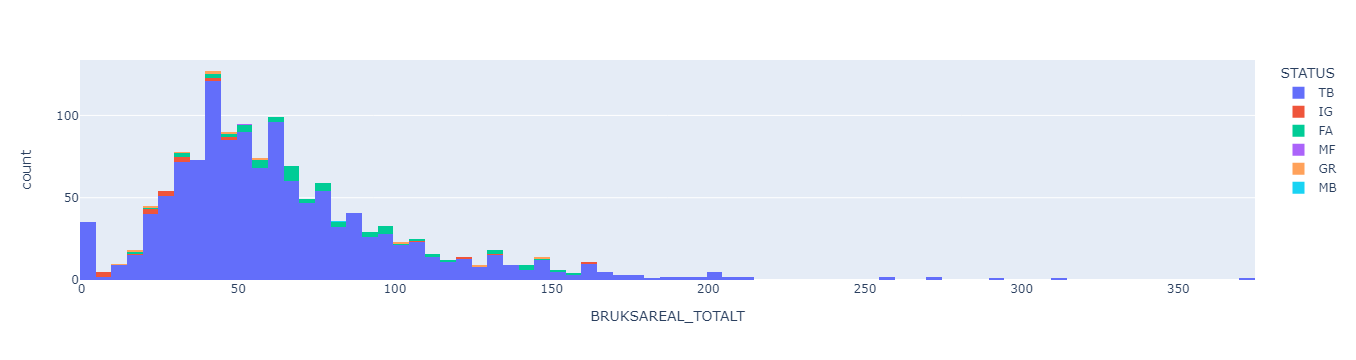

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9.3-src.zip/py4j/clientserver.py", line 480, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9.3-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/spark/python/lib/py4j-0.10.9.3-src.zip/py4j/clientserver.py", line 503, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving
/usr/local/spark/python/pyspark/context.py:468: RuntimeWarning:

Unable to cleanly shutdown Spark JVM process. It is possible that the process has crashed, been killed or may also be in a zombie state.



In [55]:
import plotly.express as px

px.histogram(bygg, x="BRUKSAREAL_TOTALT", color="STATUS")